In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the data from the .npz file
# filename = "FYP/Convergence 4000 Simulations/20 Window Naive Power Ranks 4000 MCS DIST_long ENG1 2018_2019 season.npz"
filename = "./FYP/ELO Model Experiments/Elo 2 2500 MCS GER1 2018_2019 DIST_short.npz"
# filename = "11 Window Naive Power Ranks 4000 MCS DIST_short ENG1 2018_2019 season.npz"
# filename = "Elo 2 2500 MCS ENG1 2018_2019 DIST_short.npz"
loaded_data = np.load(filename, allow_pickle=True)

# Extract the arrays from the loaded data
team_names = loaded_data["team_names"]
expected_points = loaded_data["expected_points"]
all_points = loaded_data["all_points"]
# current_points = loaded_data["c"]
f_HDA_array = loaded_data["f_HDA"]
f_HDA_year_range_array = loaded_data["f_HDA_year_range"]
f_HDA_metadata_array = loaded_data["f_HDA_metadata"]
loaded_score_log = loaded_data["score_log"]
YYYY_range_file_names = loaded_data["YYYY_range_file_names"]
frequencies_home_win = loaded_data["frequencies_home_win"]
frequencies_home_draw = loaded_data["frequencies_home_draw"]
frequencies_home_loss = loaded_data["frequencies_home_loss"]
simulated_simple_balance = loaded_data["simulated_simple_balance"]
simulated_kelly_balance = loaded_data["simulated_kelly_balance"]
brier_score_and_rps_avg = loaded_data["brier_score_and_rps_avg"]
rps_all = loaded_data["rps_all"]
o_true = loaded_data["o_true"]
f_prob = loaded_data["f_prob"]
country_data = loaded_data["country_data"]
level_data = loaded_data["level_data"]

# get original dictionaries
f_HDA = { 'H': f_HDA_array[0], 'D': f_HDA_array[1], 'A': f_HDA_array[2] }
f_HDA_year_range = { 'YYYY_start': f_HDA_year_range_array[0], 'YYYY_end': f_HDA_year_range_array[1] }
f_HDA_metadata = { 'Countries': f_HDA_metadata_array[0], 'Level': f_HDA_metadata_array[1] }



In [11]:

# get ordered points dataframe
team_names = team_names.tolist()
expected_points = expected_points.tolist()
points_df = pd.DataFrame(np.array([team_names,expected_points]).T, columns=["Team","Simulated Average Points"])
points_df = points_df.sort_values(by=["Simulated Average Points"], ascending=False, ignore_index=True)
points_df.index += 1
print(points_df)
# print(f_prob)

                  Team Simulated Average Points
1        Bayern Munich                  78.2856
2             Dortmund                   59.906
3           Hoffenheim                   54.702
4           Leverkusen                  52.2228
5           RB Leipzig                  52.0064
6           Schalke 04                  51.8984
7           M'gladbach                  51.2208
8        Werder Bremen                  47.0044
9        Ein Frankfurt                  46.4428
10           Stuttgart                  44.7096
11              Hertha                  43.7672
12           Wolfsburg                  43.4448
13            Augsburg                   41.526
14            Freiburg                  40.1772
15               Mainz                  39.6168
16            Hannover                  36.6304
17  Fortuna Dusseldorf                  30.1668
18            Nurnberg                  29.0656


In [12]:
for f in f_prob:
    print(f)

[0.61538462 0.38461538 0.        ]
[0.29411765 0.35294118 0.35294118]
[0.34730539 0.32934132 0.32335329]
[0.53424658 0.28767123 0.17808219]
[0.37125749 0.2754491  0.35329341]
[0.5326087 0.2173913 0.25     ]
[0.33846154 0.16923077 0.49230769]
[0.53146853 0.25874126 0.20979021]
[0.34730539 0.32934132 0.32335329]
[0.29411765 0.35294118 0.35294118]
[0.34730539 0.32934132 0.32335329]
[0.4787234  0.24468085 0.27659574]
[0.70833333 0.16666667 0.125     ]
[0.59090909 0.26136364 0.14772727]
[0.359375 0.21875  0.421875]
[0.04545455 0.13636364 0.81818182]
[0.76470588 0.23529412 0.        ]
[0.5        0.34848485 0.15151515]
[0.5        0.34848485 0.15151515]
[0.76470588 0.23529412 0.        ]
[0.1 0.2 0.7]
[0.4787234  0.24468085 0.27659574]
[0.34730539 0.32934132 0.32335329]
[0.59090909 0.26136364 0.14772727]
[0.4787234  0.24468085 0.27659574]
[0.44086022 0.21505376 0.34408602]
[0.92857143 0.03571429 0.03571429]
[0.92857143 0.03571429 0.03571429]
[0.37254902 0.33333333 0.29411765]
[0.37125749 0.2

In [13]:
brier_score = brier_score_and_rps_avg[0]
rps_avg = brier_score_and_rps_avg[1]
Country = country_data[0]
Level = level_data[0]
YYYY_start = YYYY_range_file_names[0]
YYYY_end = YYYY_range_file_names[1]
k = len(simulated_simple_balance)


def accuracy_indicator_function():
    max_indices_f_prob = np.argmax(f_prob, axis=1) # get indices of maximum
    max_indices_o_true = np.argmax(o_true, axis=1) # get indices of maximum
    # xor = np.logical_xor(max_indices_f_prob, max_indices_o_true)
    # not_xor = np.logical_not(xor).astype(int)
    # return not_xor
    list = []
    print(len(max_indices_o_true))
    for i in range(0,len(max_indices_o_true)):
        if max_indices_f_prob[i] == max_indices_o_true[i]:
            list.append(1)
        else:
            list.append(0)
    return np.array(list)


indicator_list = accuracy_indicator_function()
accuracy = np.sum(indicator_list)/len(indicator_list)

print(f'{k} Simulations:')
print(f"Brier Score {brier_score} for {Country}1 : {YYYY_start-1}-{YYYY_end-1} season")
print(f"RPS_avg {rps_avg} for {Country}1 : {YYYY_start-1}-{YYYY_end-1} season")
print(f"Accuracy {accuracy} for {Country}1 : {YYYY_start-1}-{YYYY_end-1} season")


# for f in f_prob:
#     print(f)
#
# print(frequencies_home_win)
# print(frequencies_home_draw)
# print(frequencies_home_loss)

306
2500 Simulations:
Brier Score 0.5477880106245006 for GER1 : 2018-2019 season
RPS_avg 0.1866762908260561 for GER1 : 2018-2019 season
Accuracy 0.5326797385620915 for GER1 : 2018-2019 season


Bayern Munich


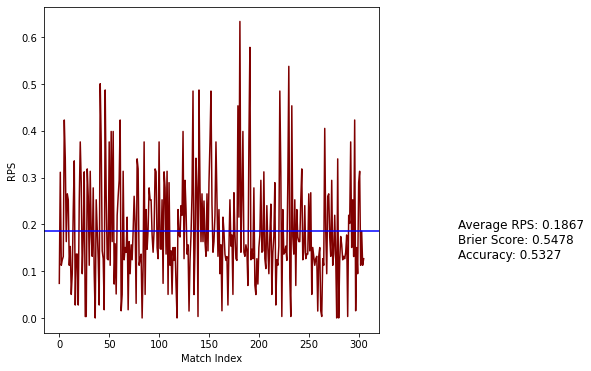

In [14]:


def plot_rps(x_axis, y_axis, title, x_label, y_label):
    # plt.
    plt.plot(x_axis, y_axis, color ='maroon')
    # plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.axhline(y=np.mean(np.array(y_axis)), color ='blue')
    plt.text(x=400, y=(np.mean(np.array(y_axis))-.02), s=f'Average RPS: {round(np.mean(np.array(y_axis)),4)}\nBrier Score: {round(brier_score,4)}\nAccuracy: {round(accuracy,4)}',color='black', ha='left', va='center', fontsize=12)
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    plt.savefig('Rank Probability Score.png', dpi=300, bbox_inches='tight')
    plt.show()
def plot_points(x_axis, y_axis, title, x_label, y_label):
    # plt.

    y_axis = np.cumsum(np.array(y_axis), axis=0) / np.array(np.arange(1,len(y_axis)+1))
    plt.plot(x_axis, y_axis, color ='maroon')
    plt.title(title)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    # plt.savefig('Converge.png', dpi=300, bbox_inches='tight')
    plt.show()

print(team_names[0])
all_points = all_points.tolist()
plot_rps(range(0,len(rps_all),1),rps_all,"Rank Probability Score (RPS) Per Simulated Match Outcome", "Match Index", "RPS")




Bayern Munich
[84, 77, 86, 81, 89, 76, 82, 84, 89, 78, 88, 68, 73, 84, 74, 84, 75, 74, 88, 71, 82, 78, 83, 69, 76, 76, 83, 81, 90, 84, 88, 75, 71, 79, 84, 77, 83, 86, 75, 78, 79, 72, 75, 82, 78, 85, 93, 76, 83, 73, 77, 94, 86, 92, 84, 86, 76, 78, 83, 76, 72, 77, 82, 73, 81, 70, 63, 80, 78, 82, 78, 78, 86, 80, 95, 85, 78, 90, 82, 78, 88, 85, 68, 86, 86, 78, 77, 83, 82, 78, 78, 82, 72, 88, 78, 81, 87, 81, 72, 74, 69, 81, 71, 84, 82, 67, 81, 78, 83, 87, 83, 77, 86, 85, 73, 74, 79, 63, 70, 73, 84, 77, 84, 76, 74, 81, 82, 79, 74, 89, 82, 69, 76, 69, 80, 79, 74, 70, 74, 78, 66, 76, 80, 73, 73, 71, 87, 73, 65, 81, 83, 75, 73, 76, 76, 82, 77, 76, 71, 78, 79, 77, 70, 74, 84, 94, 81, 68, 83, 95, 79, 74, 89, 81, 74, 79, 75, 67, 72, 98, 84, 72, 83, 71, 90, 77, 81, 77, 80, 79, 83, 87, 71, 81, 83, 77, 70, 82, 85, 88, 81, 81, 77, 77, 84, 86, 82, 77, 66, 79, 79, 69, 85, 73, 81, 86, 81, 77, 84, 71, 84, 83, 70, 85, 77, 78, 67, 78, 81, 82, 84, 81, 82, 72, 76, 77, 81, 79, 77, 73, 81, 92, 67, 80, 87, 76, 7

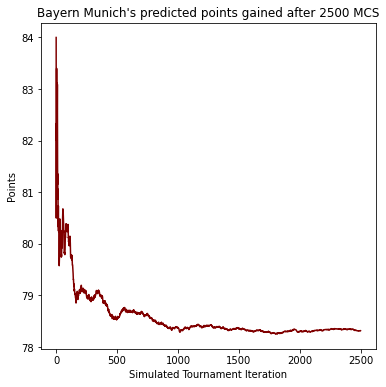

Dortmund
Hoffenheim
Leverkusen
RB Leipzig
Schalke 04
M'gladbach
Werder Bremen
Ein Frankfurt
Stuttgart
Hertha
Wolfsburg
Augsburg
Freiburg
Mainz
Hannover
Fortuna Dusseldorf
Nurnberg


In [15]:
for i in range(0, len(team_names), 1):
    print(team_names[i])
    if team_names[i] == 'Liverpool' or team_names[i] == 'Leicester' or team_names[i] == 'Bayern Munich':
        print(all_points[team_names[i]])
        plot_points(range(0,len(all_points[team_names[i]]),1),all_points[team_names[0]],f"{team_names[i]}'s predicted points gained after {len(all_points[team_names[i]])+1} MCS", "Simulated Tournament Iteration", "Points")

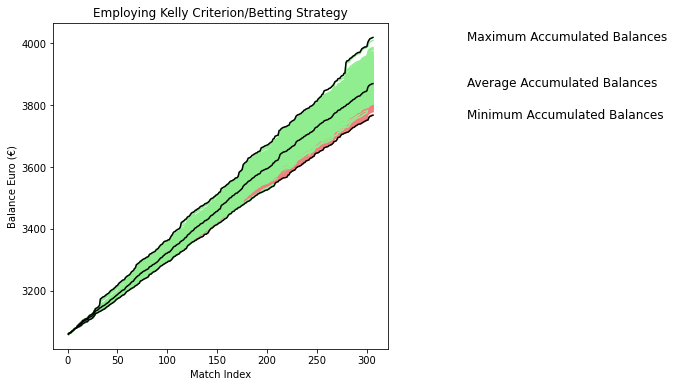

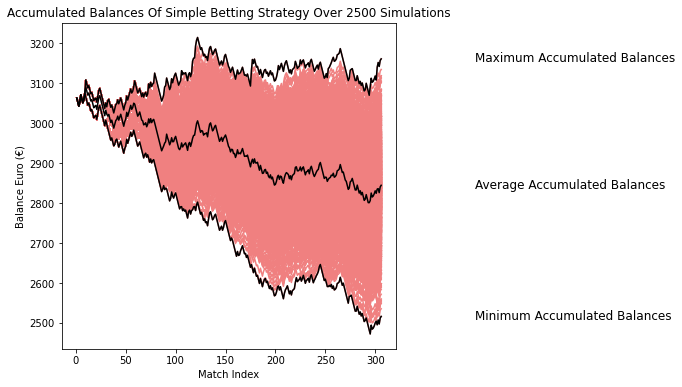

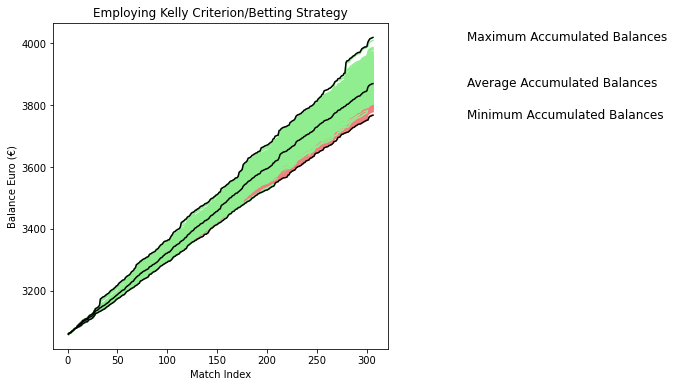

In [16]:
# def moving_average(a, n=5) :
#     '''https://stackoverflow.com/questions/14313510/how-to-calculate-rolling-moving-average-using-python-numpy-scipy'''
#     ret = np.cumsum(a, dtype=float)
#     ret[n:] = ret[n:] - ret[:-n]
#     print( ret)
#     return np.mean(ret[n - 1:] / n, axis=0)
def get_max_line(x):

    y = np.zeros(shape=[np.shape(x)[1]])
    for i in range(np.shape(x)[1]):
        arr = x[:,i]
        y[i] += max(arr)
    return y.tolist()

def get_min_line(x):

    y = np.zeros(shape=[np.shape(x)[1]])
    for i in range(np.shape(x)[1]):
        arr = x[:,i]
        y[i] += min(arr)
    return y.tolist()

def get_avg_line(x):
    # print(np.shape(x)[0],np.shape(x)[1])
    y = np.zeros(shape=[np.shape(x)[1]])
    for z in x.tolist():
        y += np.array(z)
    # print(y)
    # print(np.shape(y))
    y /= np.shape(x)[0]
    return y.tolist()
    # return np.convolve(y, np.ones(w), 'valid') / w

def plot_balances_simulated(x_axis, y_axis, title, x_label, y_label):
    # plt.
    for y_list in y_axis:
        color = ""
        last_bal = y_list[-1]
        if last_bal < 3800:
            # color += "red"
            color += "lightcoral"
        elif last_bal > 3800:
            # color += "green"
            color += "lightgreen"
        else:
            # sum_y == 1000
            color += "blue"
        plt.plot(x_axis, y_list, color=color)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_axis, get_max_line(y_axis), color ='black')
    plt.text(x=400, y=get_max_line(y_axis)[-1]+2, s='Maximum Accumulated Balances',color='black', ha='left', va='center', fontsize=12)
    fig = plt.gcf()
    plt.plot(x_axis, get_min_line(y_axis), color ='black')
    plt.text(x=400, y=get_min_line(y_axis)[-1]+2, s='Minimum Accumulated Balances',color='black', ha='left', va='center', fontsize=12)
    fig = plt.gcf()
    plt.plot(x_axis, get_avg_line(y_axis), color ='black')
    plt.text(x=400, y=get_avg_line(y_axis)[-1]+2, s='Average Accumulated Balances',color='black', ha='left', va='center', fontsize=12)
    fig = plt.gcf()
    fig.set_size_inches(6, 6)
    plt.savefig('Betting_model.png', dpi=300, bbox_inches='tight')
    plt.show()

plot_balances_simulated(range(1,len(simulated_simple_balance[0])+1,1),simulated_simple_balance, f"Accumulated Balances Of Simple Betting Strategy Over {k} Simulations",  "Match Index", "Balance Euro (€)")
plot_balances_simulated(range(1,len(simulated_kelly_balance[0])+1,1),simulated_kelly_balance, f"Employing Kelly Criterion/Betting Strategy",  "Match Index", "Balance Euro (€)")

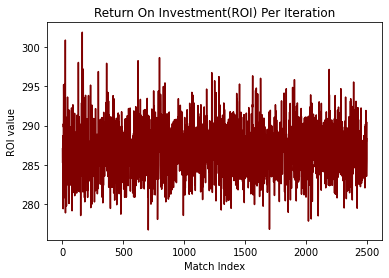

Average ROI:  286.94856881268504
3869.48568812685


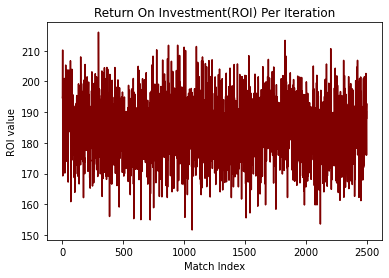

Average ROI:  184.41823999999988
2844.182399999999


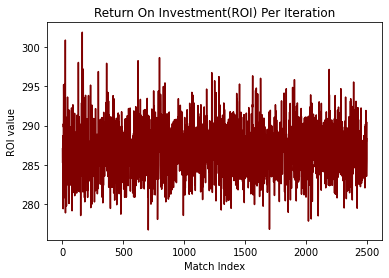

Average ROI:  286.94856881268504
3869.48568812685


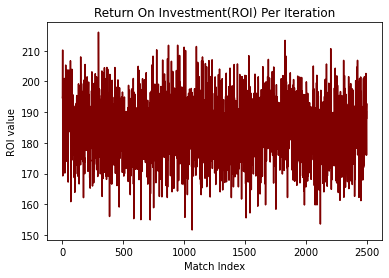

Average ROI:  184.41823999999988
2844.182399999999


In [17]:
#To calculate the ROI:

def plot_roi(x_axis, y_axis, title, x_label, y_label):
    # plt.
    plt.plot(x_axis, y_axis, color ='maroon')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # plt.axhline(y=np.mean(np.array(y_axis)), color ='blue')
    plt.show()
#ROI = (Total Profit / Total Investment) x 100%
ROI = []
for season_balance in simulated_kelly_balance:
    profit = season_balance[-1]-1000
    ROI.append((profit/1000)*100)
plot_roi(range(1,len(ROI)+1), ROI,"Return On Investment(ROI) Per Iteration", "Match Index","ROI value")

# # Create a bar chart of ROI values
# plt.bar(range(len(ROI)), ROI, color='maroon')
# plt.xlabel('Simulation number')
# plt.ylabel('ROI (%)')
# plt.title('ROI for Simulated Account Balances')
# plt.show()
print("Average ROI: ",((np.mean(np.array(simulated_kelly_balance[:,[-1]]))-1000)/1000)*100)
# print(ROI)
print(np.mean(np.array(simulated_kelly_balance[:,[-1]])))

ROI = []
for season_balance in simulated_simple_balance:
    profit = season_balance[-1]-1000
    ROI.append((profit/1000)*100)
plot_roi(range(1,len(ROI)+1), ROI,"Return On Investment(ROI) Per Iteration", "Match Index","ROI value")


# # Create a bar chart of ROI values
# plt.bar(range(len(ROI)), ROI, color='maroon')
# plt.xlabel('Simulation number')
# plt.ylabel('ROI (%)')
# plt.title('ROI for Simulated Account Balances')
# plt.show()
print("Average ROI: ",((np.mean(np.array(simulated_simple_balance[:,[-1]]))-1000)/1000)*100)
# print(ROI)
print(np.mean(np.array(simulated_simple_balance[:,[-1]])))

In [18]:
print("Simulations:", k)
print("team_names:", team_names)
print("expected_points:", expected_points)
print("f_HDA:", f_HDA)
print("f_HDA_year_range:", f_HDA_year_range)
print("f_HDA_metadata:", f_HDA_metadata)
print("loaded_score_log:", loaded_score_log)
print("YYYY_range_file_names:", YYYY_range_file_names)
print("frequencies_home_win:", frequencies_home_win)
print("frequencies_home_draw:", frequencies_home_draw)
print("frequencies_home_loss:", frequencies_home_loss)
# print("simulated_balance_history:", simulated_balance_history)
print("brier_score_and_rps_avg:", brier_score_and_rps_avg)
# print("rps_all:", rps_all)
# print("o_true:", o_true)
# print("f_prob:", f_prob)


Simulations: 2500
team_names: ['Bayern Munich', 'Dortmund', 'Hoffenheim', 'Leverkusen', 'RB Leipzig', 'Schalke 04', "M'gladbach", 'Werder Bremen', 'Ein Frankfurt', 'Stuttgart', 'Hertha', 'Wolfsburg', 'Augsburg', 'Freiburg', 'Mainz', 'Hannover', 'Fortuna Dusseldorf', 'Nurnberg']
expected_points: [78.2856, 59.906, 54.702, 52.2228, 52.0064, 51.8984, 51.2208, 47.0044, 46.4428, 44.7096, 43.7672, 43.4448, 41.526, 40.1772, 39.6168, 36.6304, 30.1668, 29.0656]
f_HDA: {'H': 26230, 'D': 15982, 'A': 14956}
f_HDA_year_range: {'YYYY_start': 2016, 'YYYY_end': 2019}
f_HDA_metadata: {'Countries': ['GER'], 'Level': []}
loaded_score_log: [[ 77699  76865  47562  53527  35345     79     33      5      3]
 [ 81536 182588  83562  69008  20451   7629     29      2      3]
 [ 97284 115527  65662  28520  20292   5078   5024      2      2]
 [ 82484 105100  31454  28107   5119     45      9      1      0]
 [ 15955  43539   8090   5223     72     15      3      1      0]
 [ 12827  15329  10156     63     17      2